In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
import torch

(1200, 1600, 3)
(1200, 1600)
[89 82 74]


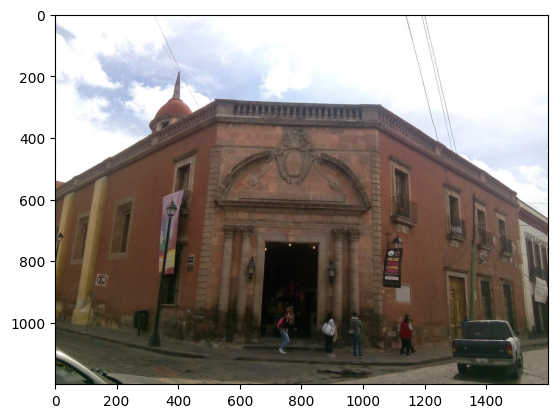

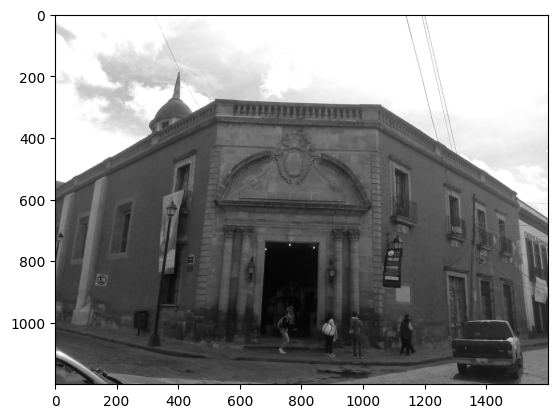

In [2]:

img = io.imread('MexCulture142\images\Colonial_AcademiaDeBellasArtes_Queretaro_N_1.png')
plt.figure(),plt.imshow(img,cmap='gray')

img_gray = color.rgb2gray(img)
plt.figure(),plt.imshow(img_gray,cmap='gray')

print(np.shape(img))
print(np.shape(img_gray))
	
# sunt inversate coordonatele !!
print(img[819,1563])


[(816, 584), (730, 654), (705, 763), (974, 824), (1011, 810), (750, 550), (705, 541), (324, 654), (958, 700), (791, 581), (710, 558), (568, 511), (762, 446), (815, 891), (734, 628), (726, 591), (718, 545), (719, 495), (713, 528), (803, 470), (485, 524), (330, 711), (333, 339), (28, 925), (87, 936), (729, 539), (1183, 788), (1093, 848), (947, 501), (842, 606), (618, 711), (815, 836), (387, 666), (1293, 778), (1513, 865), (1049, 1001), (959, 1026), (719, 619), (716, 578), (720, 524), (451, 621), (419, 575), (695, 773), (694, 958), (701, 1003), (1069, 844), (1240, 777), (1353, 751), (833, 539), (772, 571), (783, 413), (415, 264), (355, 542), (773, 906), (783, 936), (939, 981), (945, 986), (1157, 971), (1136, 768), (1133, 808), (793, 485), (781, 444), (964, 564), (830, 522), (524, 569), (440, 673), (1239, 858), (862, 1021), (811, 773), (390, 281), (172, 521), (1287, 732), (838, 642), (673, 767), (728, 1021), (756, 1114), (726, 1127), (773, 1097), (361, 922), (127, 854), (349, 491), (305, 4

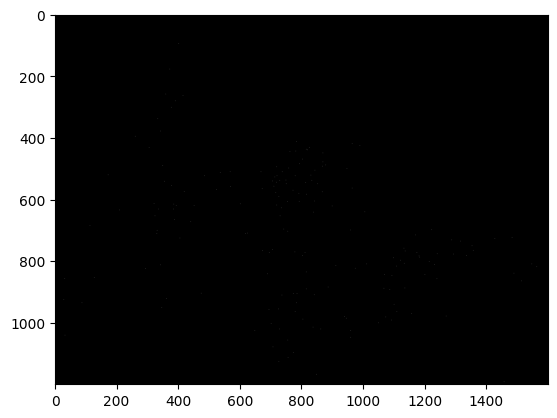

In [3]:
img_2 = np.uint8(np.zeros(np.shape(img_gray)))

# Citim fisierul txt 1 din fixations si salvam coordonatele intr o lista
f = open('MexCulture142/fixations/Colonial_AcademiaDeBellasArtes_Queretaro_GazeFix_N_1.txt', 'r')
lines = f.readlines()
coord = []
for line in lines:
    x,y = line.split()
    coord.append((int(x),int(y)))
f.close()

# Afisam lista cu coordonate
print(coord)

# Facem coord np array
coord = np.array(coord)
print(np.shape(coord))
print(np.shape(img_2))

# Formam imaginea 2 cu 1 pe pozitiile respective si afisam
for c in coord:
    img_2[c[1],c[0]] = 1

plt.figure(),plt.imshow(img_2,cmap='gray')

# Numara cati de 1 sunt in imagine
print(np.sum(img_2))

In [7]:
from PIL import Image
import os

def redimensioneaza_si_comprima(cale_intrare, cale_iesire, dimensiune=(32, 32), calitate=95):
    """
    Redimensionează o imagine la dimensiunea specificată și o salvează,
    folosind filtrul LANCZOS pentru cea mai bună calitate la downsampling.

    Parametri:
    - cale_intrare (str): Calea către imaginea de intrare.
    - cale_iesire (str): Calea unde se va salva imaginea redimensionată.
    - dimensiune (tuple): Dimensiunea dorită (implicit 32x32).
    - calitate (int): Calitatea de compresie JPEG (1-100). Ignorată pentru PNG.
    """
    try:
        # 1. Deschide imaginea
        img = Image.open(cale_intrare)
        
        # 2. Redimensionează imaginea
        # Image.Resampling.LANCZOS este cel mai bun filtru pentru downsampling de înaltă calitate.
        img_redimensionata = img.resize(dimensiune, Image.Resampling.LANCZOS)
        
        # 3. Salvează imaginea redimensionată
        # Verifică extensia pentru a aplica calitatea de compresie (relevantă pentru JPEG)
        extensie = os.path.splitext(cale_iesire)[1].lower()
        
        if extensie in ('.jpg', '.jpeg'):
            # Salvare JPEG cu opțiuni de calitate și optimizare
            img_redimensionata.save(cale_iesire, "JPEG", optimize=True, quality=calitate)
        elif extensie == '.png':
            # Salvare PNG (fără pierderi, dar putem optimiza compresia)
            # Parametrul 'compress_level' poate fi 0 (fără compresie) la 9 (compresie maximă, mai lentă)
            img_redimensionata.save(cale_iesire, "PNG", compress_level=9)
        else:
            # Salvare pentru alte formate, fără parametri specifici de compresie
            img_redimensionata.save(cale_iesire)
            
        print(f"Imaginea a fost redimensionată și salvată la: {cale_iesire}")
        print(f"Dimensiune finală: {img_redimensionata.size}")

    except FileNotFoundError:
        print(f"Eroare: Fișierul de intrare nu a fost găsit la {cale_intrare}")
    except Exception as e:
        print(f"A apărut o eroare: {e}")

# --- Exemplu de utilizare ---
# if __name__ == "__main__":
#     # Schimbă aceste căi cu fișierele tale reale
#     fisier_intrare = "MexCulture142\gazefixationsdensitymaps\Colonial_AcademiaDeBellasArtes_Queretaro_GFDM_N_1.png" # sau .jpg
#     fisier_iesire = "harta_salienta_32x32.png"    # Alege formatul de ieșire
    
#     # Creează un fișier fals pentru testare dacă nu există
#     if not os.path.exists(fisier_intrare):
#         try:
#             # Creează o imagine simplă (ex. 128x128) pentru a testa scriptul
#             img_test = Image.new('RGB', (128, 128), color = 'red')
#             img_test.save(fisier_intrare)
#             print(f"Fișier de test '{fisier_intrare}' creat pentru demonstrație.")
#         except:
#             print(f"Atenție: Nu s-a putut crea un fișier de test. Asigură-te că imaginea '{fisier_intrare}' există.")
    
#     redimensioneaza_si_comprima(fisier_intrare, fisier_iesire, calitate=90) # Ajustează calitatea (1-100) dacă salvezi în JPEG

#     plt.figure(),plt.imshow(io.imread(fisier_intrare),cmap='gray')
#     plt.figure(),plt.imshow(io.imread(fisier_iesire),cmap='gray')

In [5]:
# MexCulture142/
# ├── images/
# │   ├── Colonial_AcademiaDeBellasArtes_Queretaro_N_1.png
# │   ├── Colonial_AcademiaDeBellasArtes_Queretaro_N_2.png
# │   └── Colonial_AdvocacionesDeLaIglesiaDeSanSimon_Michoacan_N_1.png
# │
# ├── gazefixationsdensitymaps/
# │   ├── Colonial_AcademiaDeBellasArtes_Queretaro_GFDM_N_1.png
# │   ├── Colonial_AcademiaDeBellasArtes_Queretaro_GFDM_N_2.png
# │   └── Colonial_AdvocacionesDeLaIglesiaDeSanSimon_Michoacan_GFDM_N_1.png
# │
# └── fixations/
#     ├── Colonial_AcademiaDeBellasArtes_Queretaro_GazeFix_N_1.txt [cite: 1]
#     ├── Colonial_AcademiaDeBellasArtes_Queretaro_GazeFix_N_2.txt [cite: 5]
#     └── Colonial_AdvocacionesDeLaIglesiaDeSanSimon_Michoacan_GazeFix_N_1.txt [cite: 2]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet34, ResNet34_Weights
from torchvision import transforms
from PIL import Image
import os
import numpy as np

# --- 1. Definirea Arhitecturii Modelului (ResNet34 + Saliency Head) ---
# (Această clasă rămâne neschimbată)

class SaliencyModel(nn.Module):
    """
    Arhitectura modelului: ResNet34 (Backbone) + Saliency Head (Decodor).
    """
    def __init__(self):
        super(SaliencyModel, self).__init__()
        
        # Încarcă ResNet34 pre-antrenat
        base_model = resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
        
        # Extractorul de caracteristici (fără ultimele 2 straturi)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])
        
        # Capul de Saliență (Saliency Head)
        # Transformă (512, 7, 7) -> (1, 32, 32)
        self.saliency_head = nn.Sequential(
            nn.Conv2d(512, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(size=(32, 32), mode='bilinear', align_corners=False),
            nn.Conv2d(64, 1, kernel_size=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        features = self.feature_extractor(x)
        saliency_map = self.saliency_head(features)
        return saliency_map

# --- 2. Definirea Setului de Date (Versiunea SIMPLĂ, FĂRĂ AUGMENTARE) ---

class MexCultureDataset(Dataset):
    """
    Clasa Dataset personalizată, simplă.
    Încarcă o imagine (Input) și harta sa GFDM (Target)
    și aplică transformările de bază (Resize, ToTensor).
    """
    def __init__(self, root_dir, transform_input=None, target_size=(32, 32)):
        self.image_dir = os.path.join(root_dir, 'images')
        self.gfdm_dir = os.path.join(root_dir, 'gazefixationsdensitymaps')
        
        self.image_files = [f for f in os.listdir(self.image_dir) if f.endswith('.png')]
        
        # Primește transformările pentru Input (X) ca parametru
        self.transform_input = transform_input
        self.target_size = target_size
        
        # Transformare standard pentru harta țintă (GFDM - Y)
        self.transform_target = transforms.Compose([
            transforms.Resize(self.target_size, 
                              interpolation=transforms.InterpolationMode.BILINEAR),
            transforms.ToTensor() 
        ])

    def __len__(self):
        # Returnează numărul total de eșantioane (imagini)
        return len(self.image_files)

    def __getitem__(self, idx):
        # --- A. Încărcare Fișiere ---
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        
        gfdm_name = img_name.replace('.png', '').replace('_N_', '_GFDM_N_') + '.png'
        gfdm_path = os.path.join(self.gfdm_dir, gfdm_name)
        
        # Deschide imaginea (X) și harta (Y)
        input_image = Image.open(img_path).convert('RGB')
        target_gfdm_image = Image.open(gfdm_path).convert('L')
        
        # --- B. Aplicare Transformări (Fără Augmentare) ---
        
        # Aplică transformările de intrare (Resize, ToTensor, Normalize)
        if self.transform_input:
            input_tensor = self.transform_input(input_image)
        
        # Aplică transformările țintă (Resize 32x32, ToTensor)
        target_tensor = self.transform_target(target_gfdm_image)
        
        return input_tensor, target_tensor

# --- 3. Execuția Principală (Antrenarea) ---

if __name__ == "__main__":
    
    # Parametrii
    ROOT_DATA_DIR = 'MexCulture142' # Asumând că folderele sunt în directorul curent
    BATCH_SIZE = 2      
    NUM_EPOCHS = 10     
    LEARNING_RATE = 0.0001
    
    # Detectează GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Se utilizează dispozitivul: {device}")

    # --- Definirea Transformărilor de Bază (Fără Augmentare) ---
    # Acestea sunt necesare pentru a pregăti imaginea pentru ResNet
    input_transform = transforms.Compose([
        transforms.Resize((224, 224)), # Redimensionează imaginea la 224x224
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Inițializare Dataset
    print(f"Încărcare set de date din: {ROOT_DATA_DIR}")
    try:
        # Creează setul de date și pasează transformările de intrare
        train_dataset = MexCultureDataset(root_dir=ROOT_DATA_DIR, 
                                          transform_input=input_transform)
        
        # Inițializare DataLoader
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
        
        print(f"Set de date încărcat. Am găsit {len(train_dataset)} eșantioane.")

        # Inițializare Model, Loss și Optimizer
        model = SaliencyModel()
        model.to(device) # Mută modelul pe GPU
        
        criterion = nn.MSELoss() 
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

        print("--- Începere Antrenare (Fără Augmentare) ---")

        # Bucla de Antrenare
        for epoch in range(NUM_EPOCHS):
            model.train() 
            epoch_loss = 0.0
            
            for inputs, targets in train_loader:
                # Mută datele pe GPU
                inputs = inputs.to(device)
                targets = targets.to(device)
                
                optimizer.zero_grad()
                
                # Forward pass
                predictions = model(inputs)
                
                # Calcul Loss
                loss = criterion(predictions, targets)
                
                # Backward pass și optimizare
                loss.backward()
                optimizer.step()
                
                epoch_loss += loss.item()
            
            print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss / len(train_loader):.6f}")

        print("--- Antrenare Finalizată ---")
        
        # Salvarea modelului antrenat
        torch.save(model.state_dict(), 'saliency_resnet34.pth')
        print("Modelul antrenat a fost salvat ca 'saliency_resnet34.pth'")

    except FileNotFoundError as e:
        print(f"\nEROARE: Nu am putut găsi folderele de date.")
        print(f"Asigură-te că scriptul rulează în folderul care conține 'images/' și 'gazefixationsdensitymaps/'.")
        print(f"Detalii: {e}")

Se utilizează dispozitivul: cuda
Încărcare set de date din: MexCulture142
Set de date încărcat. Am găsit 284 eșantioane.
--- Începere Antrenare (Fără Augmentare) ---
--- Începere Antrenare (Fără Augmentare) ---
Epoch 1/10, Loss: 0.020789
Epoch 1/10, Loss: 0.020789
Epoch 2/10, Loss: 0.010219
Epoch 2/10, Loss: 0.010219
Epoch 3/10, Loss: 0.007152
Epoch 3/10, Loss: 0.007152
Epoch 4/10, Loss: 0.005515
Epoch 4/10, Loss: 0.005515
Epoch 5/10, Loss: 0.004654
Epoch 5/10, Loss: 0.004654


Se pregătește modelul...
EROARE: Nu am găsit fișierul modelului 'saliency_resnet34_weights.pth'.
Asigură-te că ai rulat scriptul de antrenare și ai salvat modelul.
Modelul a fost încărcat de la 'saliency_resnet34_weights.pth' și rulează pe cuda.
Se rulează predicția...

--- SUCCES ---
Harta de saliență a fost salvată ca 'predicted_saliency_map.png'.
Aceasta este o imagine de 32x32. Pentru a o vedea mai bine, măriți-o.
128
<PIL.Image.Image image mode=L size=32x32 at 0x1BB630AF9D0>
Harta de saliență redimensionată a fost salvată ca 'predicted_saliency_map_upscaled.png'.
Modelul a fost încărcat de la 'saliency_resnet34_weights.pth' și rulează pe cuda.
Se rulează predicția...

--- SUCCES ---
Harta de saliență a fost salvată ca 'predicted_saliency_map.png'.
Aceasta este o imagine de 32x32. Pentru a o vedea mai bine, măriți-o.
128
<PIL.Image.Image image mode=L size=32x32 at 0x1BB630AF9D0>
Harta de saliență redimensionată a fost salvată ca 'predicted_saliency_map_upscaled.png'.


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1ba88945a90>)

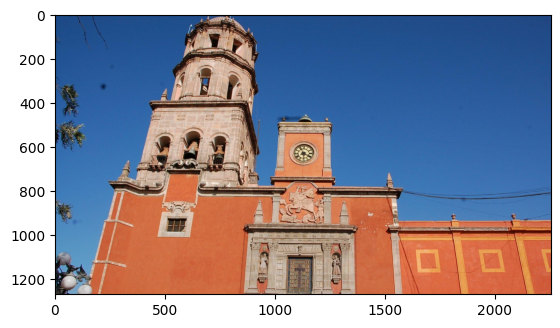

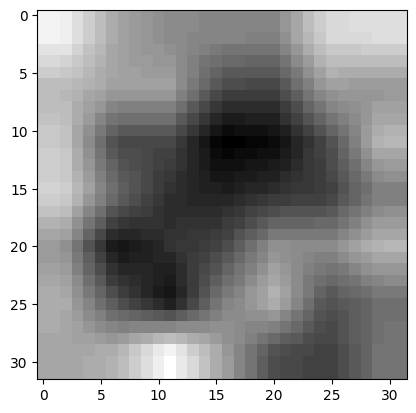

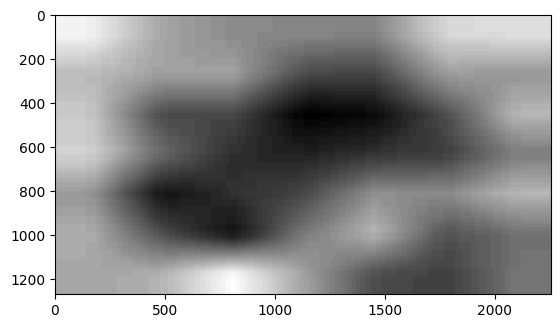

: 

In [ ]:
import warnings
import matplotlib.pyplot as plt

# Testare model
MODEL_PATH = 'saliency_resnet34_weights.pth'
OUTPUT_NAME = 'predicted_saliency_map.png'

# Suprimă avertismentele (unele pot apărea la descărcare)
warnings.filterwarnings('ignore')

# --- 3. Pregătirea Modelului ---
print("Se pregătește modelul...")
# Detectează GPU dacă e disponibil
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inițiază modelul și încarcă greutățile salvate
model = SaliencyModel()
try:
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
except FileNotFoundError:
    print(f"EROARE: Nu am găsit fișierul modelului '{MODEL_PATH}'.")
    print("Asigură-te că ai rulat scriptul de antrenare și ai salvat modelul.")
    exit()

# Mută modelul pe GPU/CPU
model.to(device)
# !!! FOARTE IMPORTANT: Setează modelul în modul de evaluare !!!
# Acest lucru dezactivează straturi ca Dropout sau Batch Normalization
model.eval() 

print(f"Modelul a fost încărcat de la '{MODEL_PATH}' și rulează pe {device}.")

# --- 4. Pregătirea Imaginii ---
# Definirea transformărilor (TREBUIE să fie identice cu cele de la antrenare)
input_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image = Image.open('MexCulture142/images/Colonial_ElTemploDeSanFrancisco_Queretaro_N_1.png').convert('RGB')

# Aplică transformările
input_tensor = input_transform(image)

# Adaugă o dimensiune "batch" (modelul așteaptă [Batch, Canale, H, W])
input_tensor = input_tensor.unsqueeze(0) 

# Mută tensorul pe același dispozitiv ca modelul
input_tensor = input_tensor.to(device)

# --- 5. Rularea Predicției (Inferență) ---
print("Se rulează predicția...")
# Oprește calculul gradienților pentru a economisi memorie și viteză
with torch.no_grad():
    # Rulează modelul
    prediction_tensor = model(input_tensor) # Ieșire: (1, 1, 32, 32)

# --- 6. Salvarea Rezultatului ---
# Mută tensorul înapoi pe CPU (dacă e pe GPU) și convertește-l în NumPy
# .squeeze() elimină dimensiunile de 1 (Batch și Canal)
prediction_np = prediction_tensor.squeeze().cpu().numpy()

# Convertește din [0, 1] (float) în [0, 255] (uint8)
output_array = (prediction_np * 255).astype(np.uint8)

# Creează o imagine PIL din array
output_image = Image.fromarray(output_array, 'L') # 'L' = Grayscale

# Salvează imaginea
output_image.save(OUTPUT_NAME)

print(f"\n--- SUCCES ---")
print(f"Harta de saliență a fost salvată ca '{OUTPUT_NAME}'.")
print("Aceasta este o imagine de 32x32. Pentru a o vedea mai bine, măriți-o.")

plt.figure(),plt.imshow(image,cmap='gray')
plt.figure(),plt.imshow(output_image,cmap='gray')
print(np.max(output_image))
print(output_image)

# upscale salieny map to original image size and show
output_image_upscaled = output_image.resize(image.size, Image.Resampling.BILINEAR)
output_image_upscaled.save('predicted_saliency_map_upscaled.png')
print(f"Harta de saliență redimensionată a fost salvată ca 'predicted_saliency_map_upscaled.png'.")
plt.figure(),plt.imshow(output_image_upscaled,cmap='gray')

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from torchvision.models import resnet34, ResNet34_Weights
# from torchvision import transforms
# import torchvision.transforms.functional as F # Importăm API-ul funcțional
# from PIL import Image
# import os
# import random # Necesar pentru a decide aleatoriu augmentările

# # --- 1. Definirea Arhitecturii Modelului (Neschimbat) ---

# class SaliencyModel(nn.Module):
#     """
#     Arhitectura modelului: ResNet34 (Backbone) + Saliency Head (Decodor).
#     """
#     def __init__(self):
#         super(SaliencyModel, self).__init__()
        
#         # Încarcă ResNet34 pre-antrenat
#         base_model = resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
        
#         # Extractorul de caracteristici (fără ultimele 2 straturi)
#         self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])
        
#         # Capul de Saliență (Saliency Head)
#         # Transformă (512, 7, 7) -> (1, 32, 32)
#         self.saliency_head = nn.Sequential(
#             nn.Conv2d(512, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Upsample(size=(32, 32), mode='bilinear', align_corners=False),
#             nn.Conv2d(64, 1, kernel_size=1),
#             nn.Sigmoid()
#         )
        
#     def forward(self, x):
#         features = self.feature_extractor(x)
#         saliency_map = self.saliency_head(features)
#         return saliency_map

# # --- 2. Definirea Setului de Date (CU AUGMENTARE) ---

# class MexCultureDataset(Dataset):
#     """
#     Clasa Dataset care implementează augmentări sincronizate (geometrice)
#     și augmentări fotometrice.
#     """
#     def __init__(self, root_dir, augment=False, input_size=(224, 224), target_size=(32, 32)):
#         self.image_dir = os.path.join(root_dir, 'images')
#         self.gfdm_dir = os.path.join(root_dir, 'gazefixationsdensitymaps')
#         self.image_files = [f for f in os.listdir(self.image_dir) if f.endswith('.png')]
        
#         self.augment = augment
#         self.input_size = input_size
#         self.target_size = target_size
        
#         # --- Transformări Standard ---
#         # 1. Transformări de Culoare/Fotometrice (Aplicat DOAR la X)
#         self.photometric_augs = transforms.Compose([
#             transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
#             transforms.RandomGrayscale(p=0.1),
#             transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 2.0)),
#         ])
        
#         # 2. Transformări de Normalizare (Aplicat DOAR la X)
#         self.normalize_input = transforms.Compose([
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#         ])
        
#         # 3. Transformare finală pentru Țintă (Y)
#         self.normalize_target = transforms.ToTensor()

#     def __len__(self):
#         return len(self.image_files)

#     def __getitem__(self, idx):
#         # --- A. Încărcare Fișiere ---
#         img_name = self.image_files[idx]
#         img_path = os.path.join(self.image_dir, img_name)
        
#         gfdm_name = img_name.replace('.png', '').replace('_N_', '_GFDM_N_') + '.png'
#         gfdm_path = os.path.join(self.gfdm_dir, gfdm_name)
        
#         # Deschide imaginea (X) și harta (Y)
#         input_image = Image.open(img_path).convert('RGB')
#         target_gfdm = Image.open(gfdm_path).convert('L') # 'L' = Grayscale

#         # --- B. Aplicare Augmentări (dacă e pe modul de antrenare) ---
#         if self.augment:
            
#             # --- Augmentări Geometrice (Sincronizate) ---
            
#             # 1. Random Resized Crop (Decupare și Redimensionare)
#             # Obținem parametrii de decupare o singură dată
#             i, j, h, w = transforms.RandomResizedCrop.get_params(
#                 input_image, scale=(0.8, 1.0), ratio=(0.75, 1.33)
#             )
#             # Aplicăm cu aceiași parametri pe X și Y, dar la dimensiuni diferite
#             input_image = F.resized_crop(input_image, i, j, h, w, self.input_size, 
#                                            interpolation=transforms.InterpolationMode.BILINEAR)
#             target_gfdm = F.resized_crop(target_gfdm, i, j, h, w, self.target_size, 
#                                            interpolation=transforms.InterpolationMode.BILINEAR)
            
#             # 2. Random Horizontal Flip (Răsturnare Orizontală)
#             if random.random() > 0.5:
#                 input_image = F.hflip(input_image)
#                 target_gfdm = F.hflip(target_gfdm)

#             # 3. Random Rotation (Rotație Ușoară)
#             if random.random() > 0.5:
#                 angle = random.uniform(-10, 10)
#                 input_image = F.rotate(input_image, angle)
#                 target_gfdm = F.rotate(target_gfdm, angle)

#             # --- Augmentări Fotometrice (Doar pe X) ---
#             input_image = self.photometric_augs(input_image)

#         else:
#             # Dacă nu augmentăm (ex. la validare), doar redimensionăm
#             input_image = F.resize(input_image, self.input_size, 
#                                      interpolation=transforms.InterpolationMode.BILINEAR)
#             target_gfdm = F.resize(target_gfdm, self.target_size, 
#                                      interpolation=transforms.InterpolationMode.BILINEAR)

#         # --- C. Finalizare și Normalizare ---
        
#         # Aplicăm normalizarea pe X
#         input_tensor = self.normalize_input(input_image)
#         # Aplicăm ToTensor pe Y
#         target_tensor = self.normalize_target(target_gfdm)
        
#         return input_tensor, target_tensor

# # --- 3. Execuția Principală (Antrenarea) ---

# if __name__ == "__main__":
    
#     # Parametrii
#     ROOT_DATA_DIR = 'MexCulture142' # Asumând că folderele sunt în directorul curent
#     BATCH_SIZE = 4      # Mărește batch size dacă GPU-ul permite
#     NUM_EPOCHS = 20     # Mai multe epoci sunt necesare cu augmentare
#     LEARNING_RATE = 0.001
    
#     # Detectează GPU
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Se utilizează dispozitivul: {device}")

#     # Inițializare Dataset (cu augmentarea activată)
#     print(f"Încărcare set de date din: {ROOT_DATA_DIR}")
#     try:
#         # Creăm setul de date setând augment=True
#         train_dataset = MexCultureDataset(root_dir=ROOT_DATA_DIR, augment=True)
        
#         # Inițializare DataLoader
#         train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
        
#         print(f"Set de date încărcat. Am găsit {len(train_dataset)} eșantioane.")

#         # Inițializare Model, Loss și Optimizer
#         model = SaliencyModel()
#         model.to(device) # Mută modelul pe GPU
        
#         criterion = nn.MSELoss() # Sau nn.BCELoss() dacă preferi
#         optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

#         print("--- Începere Antrenare cu Augmentare ---")

#         # Bucla de Antrenare
#         for epoch in range(NUM_EPOCHS):
#             model.train() # Setează modelul în modul de antrenare
#             epoch_loss = 0.0
            
#             for inputs, targets in train_loader:
#                 # Mută datele pe GPU
#                 inputs = inputs.to(device)
#                 targets = targets.to(device)
                
#                 optimizer.zero_grad()
                
#                 # Forward pass
#                 predictions = model(inputs)
                
#                 # Calcul Loss
#                 loss = criterion(predictions, targets)
                
#                 # Backward pass și optimizare
#                 loss.backward()
#                 optimizer.step()
                
#                 epoch_loss += loss.item()
            
#             print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss / len(train_loader):.6f}")

#         print("--- Antrenare Finalizată ---")
        
#         # Salvarea modelului antrenat
#         torch.save(model.state_dict(), 'saliency_resnet34_augmented.pth')
#         print("Modelul antrenat (cu augmentare) a fost salvat ca 'saliency_resnet34_augmented.pth'")

#     except FileNotFoundError as e:
#         print(f"\nEROARE: Nu am putut găsi folderele de date.")
#         print(f"Asigură-te că scriptul rulează în folderul care conține 'images/' și 'gazefixationsdensitymaps/'.")
#         print(f"Detalii: {e}")